
# 1. Import the required libraries and read the dataset.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

# 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.


In [3]:
data.sample(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
1280,1281,65,40,98,95064,3,1.8,2,333,0,0,0,0,0
2070,2071,62,37,95,91107,3,0.5,1,0,0,0,0,0,0
3521,3522,36,10,30,91711,2,0.8,3,0,0,0,0,1,0
1070,1071,36,9,40,90840,2,1.0,2,0,0,0,0,1,0
4499,4500,53,26,22,91304,1,0.5,2,0,0,0,0,1,1
4538,4539,51,24,85,94305,3,2.0,2,0,0,0,0,0,0
862,863,50,23,15,94025,2,1.0,2,101,0,0,0,0,0
2192,2193,25,1,13,95814,4,1.0,1,95,0,0,0,0,1
2288,2289,35,11,72,94706,3,2.6,2,0,0,0,0,1,0
3044,3045,41,16,15,94124,2,0.3,2,83,0,0,0,0,0


In [4]:
data.shape

(5000, 14)

In [5]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


# 3. Check if there are any duplicate records present in the dataset? If yes, drop them. and Drop the columns which you feel are redundant

In [7]:
data.duplicated().sum()

0

# 4. Display the Five Point Summary and write your key findings

In [8]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


1. Age and Experience:
The average age of customers is approximately 45 years, with a minimum of 23 years and a maximum of 67 years.
The average experience is approximately 20 years, with a minimum of -3 years (which seems like a data entry error or anomaly) and a maximum of 43 years.

2. Income:
The average income is around $ 73,774, with max income of $ 8 and a maximum income of $ 224.

3. ZIP Code:
The ZIP codes range from 9307 to 96651, with a median (50th percentile) ZIP code of 93437.

4. Family:
On average, customers have approximately 2.4 members in their families.

5. Credit Card Spending (CCAvg):
The average credit card spending per month is approximately $1,937.94.

6. Education:
Most customers have an education level between 1 and 3, with 1 representing undergraduate education and 3 representing advanced 
degrees.

7. Mortgage:
On average, customers have a mortgage of approximately $ 56 with some customers having no mortgage and others having up to $ 635.

8. Personal Loan, Securities Account, CD Account, Online, and Credit Card:
The percentages of customers who have a personal loan, securities account, CD account, use online banking, and have a credit card are shown as proportions between 0 and 1.

# 5. There are negative values in the variable 'Experience'. Convert them to non-negative values. (Hint: .abs function)

In [9]:
data['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43], dtype=int64)

In [10]:
data['Experience'] = data['Experience'].apply(lambda x:abs(x))

In [11]:
data['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, 34,  0, 38, 40, 33,  4, 42, 43], dtype=int64)

# 6. Get the target column distribution and comment on the class distribution

In [12]:
data['Personal Loan'].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='Personal Loan', ylabel='count'>

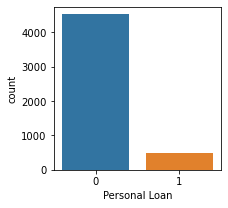

In [13]:
plt.figure(figsize = (3, 3))
sns.countplot(data = data, x ='Personal Loan')

# 7. Store the target column (i.e.Personal Loan) in the y variable and the rest of the columns in the X variable.

In [14]:
X = data.drop(columns = ['Personal Loan'],axis=1)

In [15]:
y = data['Personal Loan']

# 8. Split the dataset into two parts (i.e. 70% train and 30% test). and standardize the columns using the z-score scaling approach.

In [16]:
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [17]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
X_train_scaled

array([[ 0.23284754,  0.75805458,  0.69112539, ..., -0.24943031,
         0.83756018,  1.55820787],
       [ 1.33100058,  1.80354411,  1.82726982, ..., -0.24943031,
         0.83756018,  1.55820787],
       [ 0.77324164, -1.07155209, -1.49376773, ..., -0.24943031,
        -1.19394406, -0.6417629 ],
       ...,
       [ 1.3400303 ,  1.62929586,  1.73987409, ...,  4.00913591,
         0.83756018,  1.55820787],
       [-1.47863196, -0.54880732, -0.53241476, ..., -0.24943031,
         0.83756018, -0.6417629 ],
       [-1.45640495,  1.71641998,  1.82726982, ..., -0.24943031,
        -1.19394406,  1.55820787]])

# 9. Train and test a Logistic Regression model to predict the likelihood of a liability customer buying personal loans. Display the train and test accuracy scores

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

train_predicts = model.predict(X_train)
test_predicts = model.predict(X_test)

train_acc = accuracy_score(y_train, train_predicts)
test_acc = accuracy_score(y_test, test_predicts)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

Train Accuracy: 0.9054285714285715
Test Accuracy: 0.9033333333333333


# 10. Print the confusion matrix and classification report for the model and write your conclusions on the results


In [21]:
confusion_matrix = confusion_matrix(y_test, test_predicts)
class_report = classification_report(y_test, test_predicts)

print("\nConfusion Matrix:")
print(confusion_matrix)

print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[1349    5]
 [ 140    6]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1354
           1       0.55      0.04      0.08       146

    accuracy                           0.90      1500
   macro avg       0.73      0.52      0.51      1500
weighted avg       0.87      0.90      0.86      1500



1. The confusion matrix indicates that out of 1354 instances of class 0 (negative class), the model correctly predicted 1349, but misclassified 5 instances as class 1 (false positives).
2. For class 1 (positive class), the model correctly predicted 6 instances, but misclassified 140 instances as class 0 (false negatives)

# PROJECT COMPLETED :)